In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


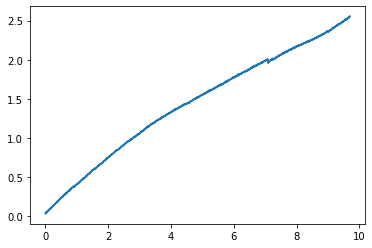

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def average_trials(exp, speed, n_trials):
  data = []
  l_min = 1E6
  for i in range(n_trials+1)[1:]:
    path = "/content/drive/MyDrive/ME 470 Work/Data/Experiment {}/{}_{}.csv".format(exp, speed, i)
    df = pd.read_csv(path)
    test_data = df.to_numpy()[6:, :]
    test_data = test_data.astype(float)
    test_data[:,0] -= test_data[0,0] # start at disp = 0
    if test_data.shape[0] < l_min:
      l_min = test_data.shape[0]
    data.append(test_data)

  for i in range(len(data)):
    data[i] = data[i][:l_min,:]

  return sum(data)/n_trials


result = average_trials(2, 0.1, 3)
plt.plot(result[:,0], result[:,1])


In [3]:
# Experiment 1, using trial 1 for each speed

%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"

test_speeds = [0.1, 1, 3, 4, 5, 6, 7, 8] # mm/s
test_speeds = [0.1, 1, 5, 8] # mm/s - don't have k data for all speeds

d = 1E-3 # m
D = (20 + 23.5)/2 * 1E-3 # m
rho = 1.29 # kg/m^3 (air)
mu = 1.81E-5 # kg/(m-s)
n = 1

dampers = []

dt = 0.1
for speed in range(len(test_speeds)):
  dampers.append(damper(d, D, rho, mu, n, exp = 1))
  u = test_speeds[speed]*1E-3 # m/s
  t_total = 10E-3/u
  n_iterations = int(t_total/dt)
  for time_step in range(n_iterations):
    dampers[speed].step(dt, u)
  dampers[speed].plotSS()


energies = []

for damper in dampers:
  energies.append(damper.energy)

plt.plot(test_speeds, energies, linewidth = 3)
plt.title("Exp 1 (Air) Absorbed Energy vs Load Rate")
plt.xlabel("Load Rate (m/s)")
plt.ylabel("Absorbed Energy (J)")

TypeError: ignored

<Figure size 432x288 with 0 Axes>

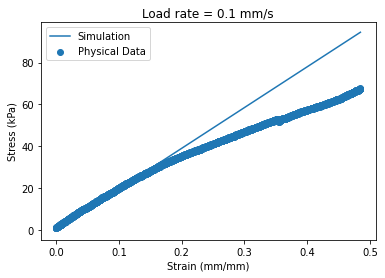

88442.90948721605


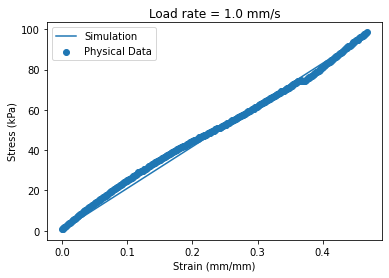

284.3252451517693


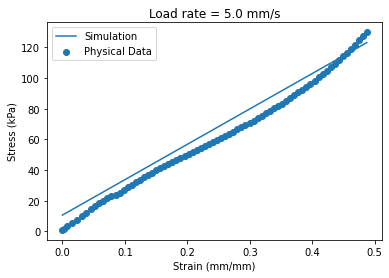

496.57738954885605


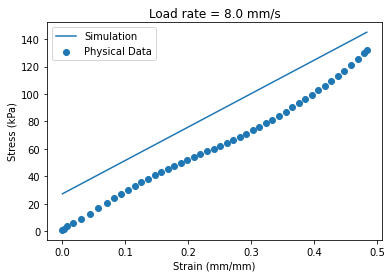

3774.447742304467
[ 10.6613271   11.07767088  12.37307374  14.21974376  16.09975051
  17.86755822  19.53358702  21.13263477  22.6900789   24.22387587
  25.74336919  27.25490323  28.76151558  30.26539794  31.76724241
  33.26804871  34.76847051  36.26846935  37.76842973  39.26800561
  40.76777375  42.26734963  43.76692551  45.26653984  46.76592347
  48.26592231  49.76545974  51.26522787  52.7648422   54.26437963
  55.76376326  57.26333914  58.76306883  60.26268316  61.76206678
  63.26183492  64.76121855  66.26083288  67.76056256  69.25990774
  70.75975277  72.2592902   73.75867383  75.25824971  76.75759489
  78.25740147  79.7565544   81.25651479  82.75632137  84.25566655
  85.75524243  87.25462606  88.75420194  90.25400852  91.7535844
  93.25319873  94.75292842  96.25208134  97.75146497  99.25104085
 100.75103969 102.25065402 103.75061441 105.24995958 106.74934321
 108.24911135 109.74830272 111.24826311 112.74780054 114.24741487
 115.7467985  117.24598987 118.74591181 120.24556459 121.74

In [ ]:
# Experiment 2

%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"

test_speeds = [0.1, 1, 5, 8] # mm/s

d = 1E-3 # m
D = (20 + 23.5)/2 * 1E-3 # m
mu = 1E-15 # kg/(m-s) 
E = 1.3E5 # N/m^2
rho = 1300 # kg/m^3 (toothpaste)
n = 1

dampers = []

for i in range(len(test_speeds)):
  dampers.append(damper(d, D, mu, E, rho, n, exp = 2))
  u = test_speeds[i] # m/s
  dampers[i].match_test(u)
  dampers[i].plotSS()

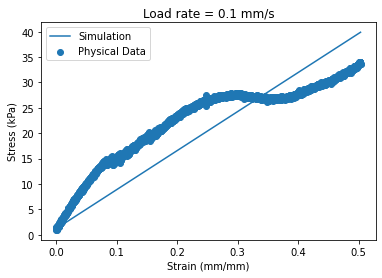

14157.614078949387


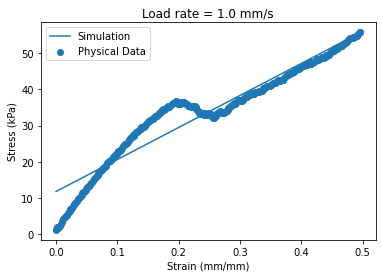

773.8277589433474


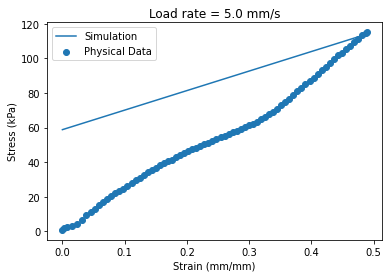

12955.113564892788


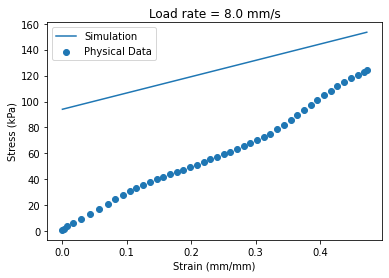

27807.471078107246


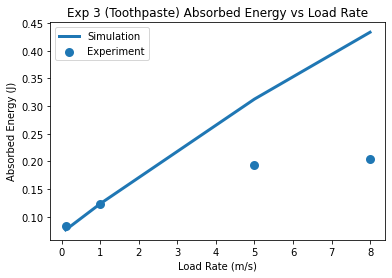

In [ ]:
# Experiment 3

%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"

test_speeds = [0.1, 1, 5, 8] # mm/s

d = 2E-3 # m
D = (20 + 23.5)/2 * 1E-3 # m
E = 1.15793770e+04 # N/m^2
mu = 4.59594615e+02 # kg/(m-s)
rho = 1300 # kg/m^3 (toothpaste)
n = 1

dampers = []

for i in range(len(test_speeds)):
  path = "/content/drive/MyDrive/ME 470 Work/Data/Experiment 3/{}_3.csv".format(test_speeds[i])
  dampers.append(damper(d, D, mu, E, rho, n, path = path))
  u = test_speeds[i]*1E-3 # m/s
  dampers[i].match_test(u)
  dampers[i].plotSS()
  print(dampers[i].least_squares())

energies = []

sim_energies = []
exp_energies = []
for damper in dampers:
  sim_energies.append(damper.energy)
  exp_energies.append(damper.left_point_integrate(\
                     *damper.process_test(damper.path)) * \
                      damper.A * damper.h * 1E3)

plt.plot(test_speeds, sim_energies, linewidth = 3, label = "Simulation")
plt.scatter(test_speeds, exp_energies, linewidth = 3, label = "Experiment")
plt.title("Exp 3 (Toothpaste) Absorbed Energy vs Load Rate")
plt.xlabel("Load Rate (m/s)")
plt.ylabel("Absorbed Energy (J)")
plt.legend()
plt.show()

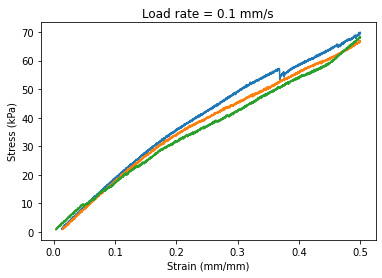

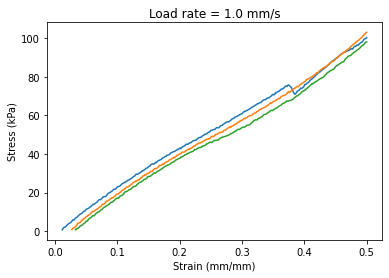

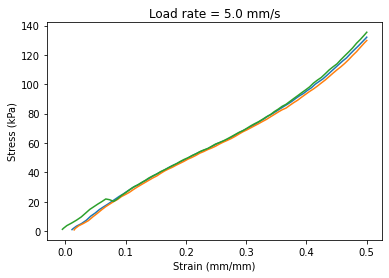

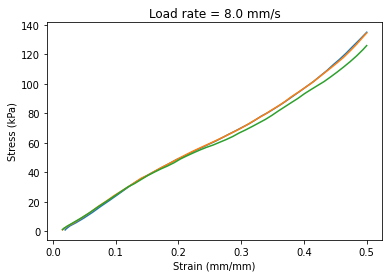

In [ ]:
# Data across trials for experiment 2

%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"

d = 1E-3 # m
D = (20 + 23.5)/2 * 1E-3 # m
rho = 1330 # kg/m^3 (toothpaste)
mu = 70 # kg/(m-s)
n = 1

test_speeds = [0.1, 1, 5, 8] # mm/s
trials = np.arange(1,4)

for speed in test_speeds:
  for trial in trials:
    path = "/content/drive/MyDrive/ME 470 Work/Data/Experiment 2/{}_{}.csv".format(speed, trial)
    test = damper(d, D, rho, mu, n, path = path)
    test.strain_history, test.stress_history = test.process_test(path)
    test.u = speed*1E-3
    test.plot_sim()
  plt.show()

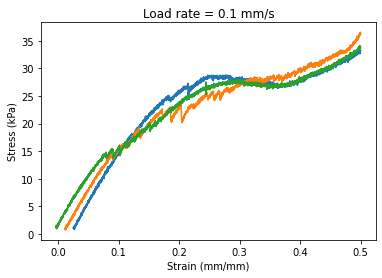

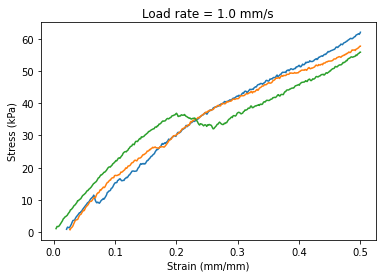

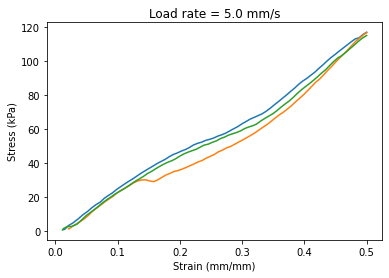

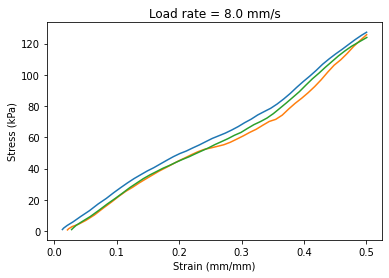

In [ ]:
# Data across trials for experiment 3

%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"

d = 2E-3 # m
D = (20 + 23.5)/2 * 1E-3 # m
rho = 1330 # kg/m^3 (toothpaste)
mu = 70 # kg/(m-s)
n = 1

test_speeds = [0.1, 1, 5, 8] # mm/s
trials = np.arange(1,4)

for speed in test_speeds:
  for trial in trials:
    path = "/content/drive/MyDrive/ME 470 Work/Data/Experiment 3/{}_{}.csv".format(speed, trial)
    test = damper(d, D, rho, mu, n, path = path)
    test.strain_history, test.stress_history = test.process_test(path)
    test.u = speed*1E-3
    test.plot_sim()
  plt.show()